In [33]:
fred_apikey = '4d68b01a5415707192c45e61f180299d'
fred_api_endpoint = 'https://api.stlouisfed.org/fred/series/observations'

fred_series_codes = [
    'GDPC1', # Real Gross Domestic Product
    'DFF', # Effective Federal Funds Rate (avg of daily rates)
    'FEDFUNDS', # Effective Federal Funds Rate (set by the fed)
    'BOPGSTB', # Balance of Payments
    'DGS1', # 1-Year Treasury Bond Yield
    'DGS2', # 2-Year Treasury Bond Yield
    'DGS3', # 3-Year Treasury Bond Yield
    'DGS5', # 5-Year Treasury Bond Yield
    'DGS7', # 7-Year Treasury Bond Yield
    'DGS10', # 10-Year Treasury Bond Yield
    'DGS20', # 20-Year Treasury Bond Yield
    'DGS30', # 30-Year Treasury Bond Yield
    'UNRATE', # Unemployment Rate
    'PAYEMS', # All Employees: Total Nonfarm Payrolls
    'PPIACO', # All Commodities: All Items PPI
    'CPALTT01USM659N', # All Commodities: All Items CPI
    'CORESTICKM159SFRBATL', # Core Personal Consumption Expenditures Price Index
    'UMCSENT', # Consumer Sentiment
    'PCECC96', # Personal Consumption Expenditures: Chain-type Price Index
    'PCEPI', # Personal Consumption Expenditures: Price Index
    'HOUST', # Total New Private Housing Units Started
    'HNFSUSNSA', # New One Family Houses for Sale
    'RHORUSQ156N', # Homeownership Rate
    'TOTALSA', # Total Vehicle Sales
    'RETAILMPCSMSA', # Total retail sales
    'RSXFS', # Retail Sales: Food Services and Drinking Places
]

yfinance_tickers = [
    'ES=F', # S&P 500
    'NQ=F', # Nasdaq 100
    'YM=F', # Dow Jones Industrial Average
    'ZB=F', # 30-Year Treasury Bond
    'ZN=F', # 10-Year Treasury Bond
    'ZF=F', # 5-Year Treasury Bond
    'ZT=F', # 2-Year Treasury Bond
    'GC=F', # Gold
    'SI=F', # Silver
    'HG=F', # Copper
    'CL=F', # Crude Oil
    'HO=F', # Heating Oil
    'NG=F', # Natural Gas
    'RB=F', # RBOB Gasoline
    'ZC=F', # Corn
    'ZO=F', # Oats
    'KE=F', # KC HRW Wheat
    'ZR=F', # Rough Rice
    'ZS=F', # Soybeans
    'ZM=F', # Soybean Meal
    'HE=F', # Lean Hogs
    'LE=F', # Live Cattle
    'CC=F', # Cocoa
    'KC=F', # Coffee
    'CT=F', # Cotton
    'LBS=F', # Lumber
    'SB=F', # Sugar
    '^VIX', # CBOE Volatility Index
]

In [34]:
import requests
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

start = '2003-01-01'
end = dt.datetime.now()

yfinance_data = pd.DataFrame()
fred_data = pd.DataFrame()
for ticker in yfinance_tickers:
    price = yf.download(ticker, start=start, end=end)['Close']
    price = price.interpolate(method='linear', limit_direction ='forward')
    log_rets = np.log(price) - np.log(price.shift(1))
    if ticker == '^VIX':
        yfinance_data[ticker] = price
        yfinance_data[f'{ticker} Volatility'] = price.rolling(21).std()
        yfinance_data[f'{ticker} Skew'] = price.rolling(21).skew()
        yfinance_data[f'{ticker} Kurtosis'] = price.rolling(21).kurt()
    else:
        yfinance_data[ticker] = price
        yfinance_data[f'{ticker} Returns'] = log_rets
        yfinance_data[f'{ticker} Volatility'] = log_rets.rolling(21).std()
        yfinance_data[f'{ticker} Returns Skew'] = log_rets.rolling(21).skew()
        yfinance_data[f'{ticker} Returns Kurtosis'] = log_rets.rolling(21).kurt()
for series_id in fred_series_codes:
    params = {
        'series_id': series_id,
        'api_key': fred_apikey,
        'file_type': 'json',
        'limit': 100000
    }
    response = requests.get(fred_api_endpoint, params=params)
    data = pd.DataFrame(response.json()['observations']).drop(columns=['realtime_start', 'realtime_end']).set_index('date')
    data = data.set_index(pd.to_datetime(data.index))
    data = data.rename(columns={'value': series_id})
    fred_data = pd.concat([fred_data, data], axis=1)
fred_data = fred_data.ffill()

df = pd.concat([yfinance_data, fred_data], axis=1)
df = df.loc[start:end]
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\allen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Returns'] = log_rets
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

[*********************100%***********************]  1 of 1 completed


C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[ticker] = price
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  yfinance_data[f'{ticker} Volatility'] = price.rolling(21).std()
C:\Users\allen\AppData\Local\Temp\ipykernel_2912\903033222.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

,ES=F,ES=F Returns,ES=F Volatility,ES=F Returns Skew,ES=F Returns Kurtosis,NQ=F,NQ=F Returns,NQ=F Volatility,NQ=F Returns Skew,NQ=F Returns Kurtosis,...,CORESTICKM159SFRBATL,UMCSENT,PCECC96,PCEPI,HOUST,HNFSUSNSA,RHORUSQ156N,TOTALSA,RETAILMPCSMSA,RSXFS
2003-02-03,858.50,0.004378,0.013097,-0.113149,-0.871616,986.00,0.001522,0.018898,-0.268705,-0.355438,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-04,849.25,-0.010833,0.012300,-0.045872,-0.778636,975.00,-0.011219,0.017995,-0.179811,-0.124080,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-05,844.50,-0.005609,0.012301,-0.012163,-0.780862,969.50,-0.005657,0.017562,-0.075925,0.120912,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-06,840.50,-0.004748,0.012055,-0.108322,-0.585495,975.00,0.005657,0.016851,-0.243838,0.573789,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-07,830.50,-0.011969,0.011273,-0.061125,-0.467314,959.50,-0.016025,0.015198,-0.471426,0.602840,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03,4049.75,0.016181,0.009888,0.048539,-0.651184,12311.25,0.020453,0.015531,0.422017,-0.427610,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-06,4052.50,0.000679,0.009269,0.047027,-0.319823,12323.50,0.000995,0.013367,0.094692,-0.999690,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-07,3989.75,-0.015605,0.009576,-0.001522,-0.456716,12169.00,-0.012616,0.013124,0.103207,-0.922977,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-08,3995.00,0.001315,0.009554,-0.114117,-0.419754,12228.25,0.004857,0.013100,-0.043848,-0.913990,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0


In [6]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_samples

silhouette_scores = {}
cluster_scores = {}
for n_clusters in range(2, 10):
    print(f'Calculating scores for {n_clusters} clusters...')
    
    dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', max_iter=100, n_jobs=-1)
    dtw.fit(df)

    silhouettes = silhouette_samples(df, dtw.labels_)
    average_silhouette = np.mean(silhouettes)
    cluster_score = average_silhouette / np.std(silhouettes)

    silhouette_scores[n_clusters] = average_silhouette
    cluster_scores[n_clusters] = cluster_score

    print(f'Average silhouette score for {n_clusters} clusters: {average_silhouette}')
    print(f'Cluster score for {n_clusters} clusters: {cluster_score}')
    print()

Calculating scores for 2 clusters...


KeyboardInterrupt: 

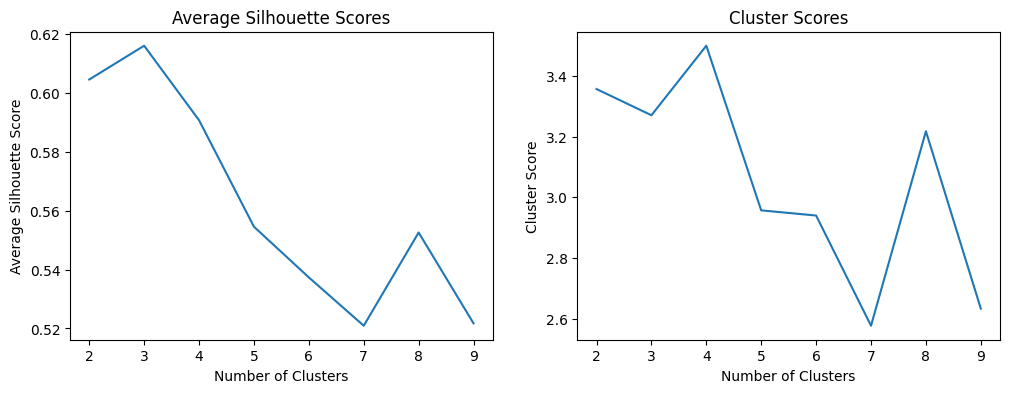

In [4]:
import matplotlib.pyplot as plt

# make a plot of the silhouette scores and another one for the cluster scores
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
ax[0].set_title('Average Silhouette Scores')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Average Silhouette Score')
ax[1].plot(list(cluster_scores.keys()), list(cluster_scores.values()))
ax[1].set_title('Cluster Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Cluster Score')
plt.show()

In [36]:
dtw = TimeSeriesKMeans(n_clusters=4, metric='dtw', max_iter=100)
dtw.fit(df)

df['Regime'] = dtw.labels_
df = df[['Regime'] + [col for col in df.columns if col != 'Regime']]
df

,Regime,ES=F,ES=F Returns,ES=F Volatility,ES=F Returns Skew,ES=F Returns Kurtosis,NQ=F,NQ=F Returns,NQ=F Volatility,NQ=F Returns Skew,...,CORESTICKM159SFRBATL,UMCSENT,PCECC96,PCEPI,HOUST,HNFSUSNSA,RHORUSQ156N,TOTALSA,RETAILMPCSMSA,RSXFS
2003-02-03,0,858.50,0.004378,0.013097,-0.113149,-0.871616,986.00,0.001522,0.018898,-0.268705,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-04,0,849.25,-0.010833,0.012300,-0.045872,-0.778636,975.00,-0.011219,0.017995,-0.179811,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-05,0,844.50,-0.005609,0.012301,-0.012163,-0.780862,969.50,-0.005657,0.017562,-0.075925,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-06,0,840.50,-0.004748,0.012055,-0.108322,-0.585495,975.00,0.005657,0.016851,-0.243838,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
2003-02-07,0,830.50,-0.011969,0.011273,-0.061125,-0.467314,959.50,-0.016025,0.015198,-0.471426,...,2.704659,79.9,9232.782,82.009,1629.0,339.0,68.0,16.114,-1.5,263188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03,1,4049.75,0.016181,0.009888,0.048539,-0.651184,12311.25,0.020453,0.015531,0.422017,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-06,1,4052.50,0.000679,0.009269,0.047027,-0.319823,12323.50,0.000995,0.013367,0.094692,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-07,1,3989.75,-0.015605,0.009576,-0.001522,-0.456716,12169.00,-0.012616,0.013124,0.103207,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0
2023-03-08,1,3995.00,0.001315,0.009554,-0.114117,-0.419754,12228.25,0.004857,0.013100,-0.043848,...,6.554492,64.9,14226.812,125.899,1309.0,436.0,65.9,15.336,-1.3,601529.0


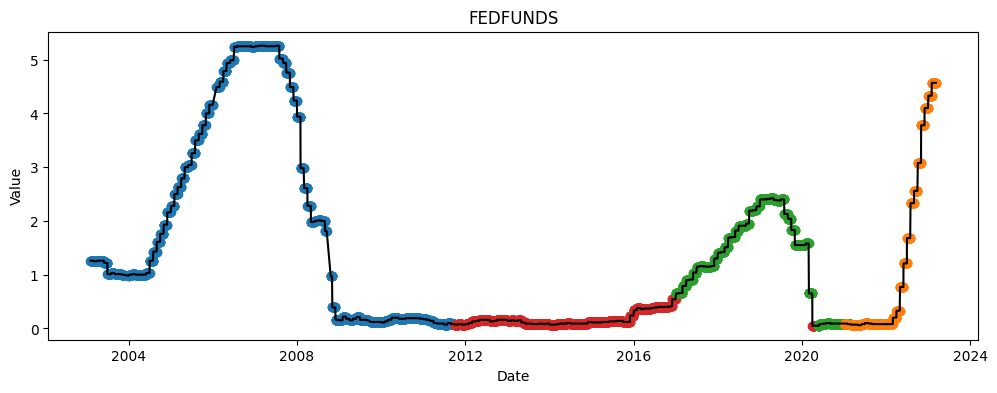

In [37]:
import matplotlib.pyplot as plt

fred_code = 'FEDFUNDS'

# plot the data using a line plot. Use colored dots ontop of the line to indicate each regime
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df[fred_code], color='black')
for regime in df['Regime'].unique():
    ax.scatter(df[df['Regime'] == regime].index, df[df['Regime'] == regime][fred_code], color=f'C{regime}')
ax.set_title(fred_code)
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.show()

In [38]:
df.to_csv('macro_data.csv')